### **Techniques used for the initialization**


**Intuition**
- the numbers generated should be $\frac/{1}{n}$. n&rarr;no of inputs a node is getting.
- that we will be mutliplying the randoms number generated by $\sqrt \frac{1}{n}$ 
- if n is large each individual weight will be samaller
- if n is samller each inidividual weight will be larger.
- Xavier initialization    
    - $```np.random.randn(2,2)*```\sqrt \frac{1}{2}$ for two input
    - only for the tanh initalization
- He normal initilization
    - - $```np.random.randn(2,2)*```\sqrt \frac{2}{2}$ for two input
    - used incase of the relu
- unifrom distribution
    - xavier uniform
        - [-limit,limit]
        - $limit=\sqrt \frac{6}{fan_in+fan_out}$
    - he uniform
        - [-limit,limit]
        - $limit=\sqrt \frac{6}{fan_in}$

In [2]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow 
from tensorflow import keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

In [3]:
X,y=make_moons(n_samples=100,noise=0.25)

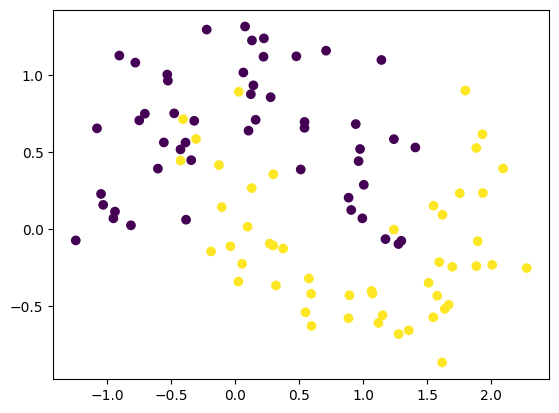

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
model = Sequential([
    Dense(10, activation='tanh', input_dim=2),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.summary()

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.get_weights()

[array([[ 0.13531244,  0.07215357, -0.2530876 , -0.18137628,  0.31746978,
          0.07479078,  0.2974252 ,  0.22566283,  0.4482563 , -0.65693974],
        [-0.5925407 , -0.36506924,  0.42962927, -0.14503253, -0.02232164,
          0.38083643, -0.44521368, -0.63172054, -0.2508287 ,  0.43790513]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.08655572, -0.2820384 , -0.27004683, -0.40343398,  0.49802804,
         -0.38116378, -0.10409918, -0.0399828 ,  0.10621482,  0.15883482],
        [ 0.310093  , -0.04687858, -0.20790115, -0.50780886,  0.12823212,
         -0.09361172, -0.22896174, -0.09300697,  0.34177125,  0.33397323],
        [ 0.06340754, -0.48298305,  0.43022567, -0.05673429, -0.19516212,
         -0.22846276,  0.48139703,  0.3678127 ,  0.00202203,  0.02748221],
        [ 0.27632076, -0.12399572, -0.25754192, -0.11696556, -0.29177785,
          0.09671384, -0.35307628,  0.4675094 ,  0.36380547,  0.542192  ],
        [-0.20683

In [7]:
initial_weights = model.get_weights()
# Layer 1: weights and bias
initial_weights[0] = np.random.randn(2, 10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(10)
# Layer 2: weights and bias
initial_weights[2] = np.random.randn(10, 10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(10)
# Layer 3: weights and bias
initial_weights[4] = np.random.randn(10, 10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(10)
# Layer 4: weights and bias
initial_weights[6] = np.random.randn(10, 10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(10)
# Layer 5: weights and bias
initial_weights[8] = np.random.randn(10, 1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(1)

model.set_weights(initial_weights)

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8000 - loss: 0.6308 - val_accuracy: 0.7000 - val_loss: 0.6380
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7875 - loss: 0.6166 - val_accuracy: 0.7000 - val_loss: 0.6276
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8000 - loss: 0.6047 - val_accuracy: 0.6500 - val_loss: 0.6183
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8000 - loss: 0.5922 - val_accuracy: 0.6500 - val_loss: 0.6094
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8000 - loss: 0.5798 - val_accuracy: 0.6500 - val_loss: 0.6004
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8000 - loss: 0.5701 - val_accuracy: 0.6500 - val_loss: 0.5909
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8000 - loss: 0.5591 - val_accuracy: 0.6500 - val_loss: 0.5822
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8000 - loss: 0.5495 - val_accuracy: 0.6500 - val_loss:

In [10]:
model.get_weights()

[array([[ 0.693062  , -1.6424474 , -0.08685087,  0.29923353, -0.09614741,
          0.44249555, -1.3267446 , -0.40993416, -0.8110078 ,  0.3539012 ],
        [-0.677206  , -1.4603035 , -0.7679133 ,  0.30871126, -1.2418038 ,
         -1.5119447 ,  0.84051853, -1.2599176 ,  0.40077102,  0.46802586]],
       dtype=float32),
 array([ 0.06534228,  0.35736653, -0.06347666, -0.01302866, -0.06630488,
        -0.08727424, -0.15683888, -0.01967915, -0.05461146, -0.06063394],
       dtype=float32),
 array([[-0.34425375, -0.17281976,  0.05145779, -0.5195543 , -0.20548752,
         -0.2636305 , -0.36759955,  0.03853505,  0.06050914, -0.92537534],
        [-0.54534495, -0.08158259, -0.06761906, -0.47821963, -0.06907406,
         -0.1354785 , -0.31720802, -0.06393522, -0.24331929, -0.08028561],
        [-0.5822601 , -0.28710562, -0.25620732,  0.5779973 ,  0.13529505,
          0.32744437, -0.3962459 , -0.06736564, -0.5421657 ,  0.03604869],
        [-0.3101461 , -0.16711088,  0.14460054, -0.4220366 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 437us/step


<Axes: >

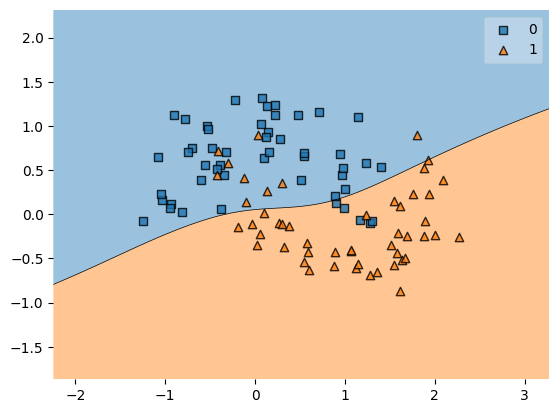

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=model)

### keras techiques for weight initilization

In [12]:
model = Sequential([
    Dense(10, activation='relu', input_dim=2,kernel_initializer='he_normal'),
    Dense(10, activation='relu',kernel_initializer='he_normal'),
    Dense(10, activation='relu',kernel_initializer='he_normal'),
    Dense(10, activation='relu',kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid',kernel_initializer='he_normal')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,y,epochs=300,validation_split=0.2)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8250 - loss: 0.3786 - val_accuracy: 0.8500 - val_loss: 0.3775
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8375 - loss: 0.3747 - val_accuracy: 0.8500 - val_loss: 0.3767
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8375 - loss: 0.3723 - val_accuracy: 0.8500 - val_loss: 0.3751
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8375 - loss: 0.3707 - val_accuracy: 0.8500 - val_loss: 0.3738
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8375 - loss: 0.3693 - val_accuracy: 0.8500 - val_loss: 0.3721
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8375 - loss: 0.3678 - val_accuracy: 0.8500 - val_loss: 0.3702
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8375 - loss: 0.3663 - val_accuracy: 0.8500 - val_loss: 0.3685
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8375 - loss: 0.3646 - val_accuracy: 0.8500 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 429us/step


<Axes: >

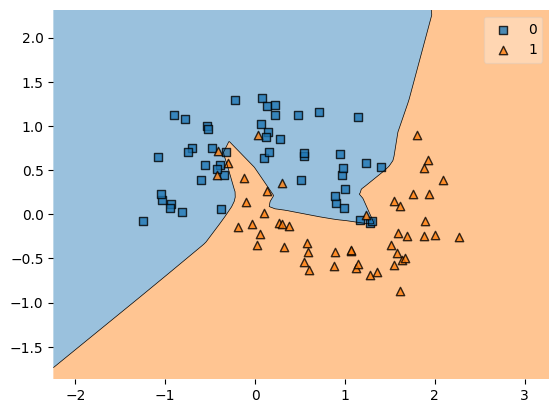

In [17]:
plot_decision_regions(X,y,clf=model)